전처리 방법  
1.표준화 = 클래스터를 추출하고 변수들을 평균 0 표준편차 1을 따르는 정규분포를따르도록 바꿔줍니다



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 사용하고자 하는 한글 폰트 경로 지정
font_prop = fm.FontProperties(fname=font_path)
matplotlib.rc('font', family=font_prop.get_name())

In [6]:
df.head()

,중년층ID,분기,상품,거래횟수,구매금액
0,5911,14_1,B문구/생활용품,15,134700
1,7561,14_4,B유아,6,197760
2,7828,14_2,B문구/생활용품,19,152420
3,7133,15_2,B식품,337,1860890
4,7172,15_2,B외식&판매시설,3,21300


In [2]:
## 중년층에서 감소고객에 정보만을뺴옴 

In [ ]:
## 물품을 레이블인코딩할지 원핫할지
## 아니면 상품컬럼별을 쭈루룩만들고 거기 거래횟수를 넣을지 TEST
## 생각해보니 30대 감소인원 고객번호만 가져왔는데 고객번호가 필요할까?....


In [3]:
!pip install --upgrade threadpoolctl

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt


In [1]:
import pandas as pd
df = pd.read_excel('CU.xlsx')

In [7]:
label_encoder = LabelEncoder()

df['분기'] = label_encoder.fit_transform(df['분기'])
df['상품'] = label_encoder.fit_transform(df['상품'])

In [17]:
# 우선 전부 레이블인코딩화 하고 표준편차로만듬

In [9]:
df.describe()

,중년층ID,분기,상품,거래횟수,구매금액
count,277507.000000,277507.000000,277507.000000,277507.000000,2.775070e+05
mean,10244.997222,3.479664,18.602814,16.947526,3.776327e+05
std,3710.052417,2.271231,11.405804,42.567493,4.150033e+06
min,5762.000000,0.000000,0.000000,1.000000,2.000000e+01
25%,7304.000000,2.000000,8.000000,1.000000,1.800000e+04
50%,8772.000000,3.000000,19.000000,3.000000,6.900000e+04
75%,13131.000000,5.000000,27.000000,11.000000,2.479500e+05
max,19347.000000,7.000000,52.000000,966.000000,1.287778e+09


In [10]:
import numpy as np
std_dev = np.std(df)

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#표준화
sc = StandardScaler()
cc_scaled = sc.fit_transform(df)
pd.DataFrame(cc_scaled) 
# 표준편차를 만들고(총액수치는 다른수치들에비해 숫자가 높기떄문에 
# 표준편차안에서 군집을미리나눈다)

,0,1,2,3,4
0,-1.168179,-1.532063,-0.140526,-0.045752,-0.058538
1,-0.723440,-0.211191,0.385523,-0.257181,-0.043343
2,-0.651474,-1.091773,-0.140526,0.048217,-0.054268
3,-0.838803,0.669390,0.122498,7.518720,0.357409
4,-0.828291,0.669390,0.297848,-0.327657,-0.085863
...,...,...,...,...,...
277502,-0.018058,-0.211191,-0.052852,-0.374642,-0.086658
277503,1.102413,1.109681,-1.017275,-0.374642,-0.064104
277504,-1.043383,1.549971,-0.578900,-0.374642,-0.073827
277505,0.296763,1.109681,-0.403551,-0.374642,-0.073839


In [13]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
clusters = kmeans.fit(cc_scaled)
df['cluster'] = clusters.labels_
#(그렇게 미리나눈 군집에 원본cluster 컬럼을 만들고 넣어줌 ))
df.head(200)

,중년층ID,분기,상품,거래횟수,구매금액,cluster
0,5911,0,17,15,134700,1
1,7561,3,23,6,197760,0
2,7828,1,17,19,152420,1
3,7133,5,20,337,1860890,0
4,7172,5,22,3,21300,0
...,...,...,...,...,...,...
195,12186,5,35,23,144667,0
196,13778,1,24,25,144550,2
197,11741,7,20,84,467873,0
198,7593,0,12,6,1559250,1


In [14]:
df.groupby('cluster').count()
# 뭔가 뭔가 뭔가 중년층 id가 잘못된것같다...

,중년층ID,분기,상품,거래횟수,구매금액
cluster,,,,,
0,96380,96380,96380,96380,96380
1,104750,104750,104750,104750,104750
2,76377,76377,76377,76377,76377


In [ ]:
# 여기서부터 다시

In [16]:
df.head()

,중년층ID,분기,상품,거래횟수,구매금액,cluster
0,5911,0,17,15,134700,1
1,7561,3,23,6,197760,0
2,7828,1,17,19,152420,1
3,7133,5,20,337,1860890,0
4,7172,5,22,3,21300,0


In [17]:
df_new = df.drop('중년층ID', axis=1) #

In [18]:
df_new.head()

,분기,상품,거래횟수,구매금액,cluster
0,0,17,15,134700,1
1,3,23,6,197760,0
2,1,17,19,152420,1
3,5,20,337,1860890,0
4,5,22,3,21300,0


In [19]:
label_encoder = LabelEncoder()

df_new['분기'] = label_encoder.fit_transform(df_new['분기'])
df_new['상품'] = label_encoder.fit_transform(df_new['상품'])

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#표준화
sc = StandardScaler()
cc_scaled = sc.fit_transform(df_new)
pd.DataFrame(cc_scaled) 

,0,1,2,3,4
0,-1.532063,-0.140526,-0.045752,-0.058538,0.519344
1,-0.211191,0.385523,-0.257181,-0.043343,-1.364327
2,-1.091773,-0.140526,0.048217,-0.054268,0.519344
3,0.669390,0.122498,7.518720,0.357409,2.403015
4,0.669390,0.297848,-0.327657,-0.085863,-1.364327
...,...,...,...,...,...
277502,-0.211191,-0.052852,-0.374642,-0.086658,0.519344
277503,1.109681,-1.017275,-0.374642,-0.064104,0.519344
277504,1.549971,-0.578900,-0.374642,-0.073827,0.519344
277505,1.109681,-0.403551,-0.374642,-0.073839,0.519344


In [21]:
kmeans = KMeans(n_clusters = 3, random_state = 0)
clusters = kmeans.fit(cc_scaled)
df_new['cluster'] = clusters.labels_
#(그렇게 미리나눈 군집에 원본cluster 컬럼을 만들고 넣어줌 ))
df_new.head(200)

,분기,상품,거래횟수,구매금액,cluster
0,0,17,15,134700,1
1,3,23,6,197760,0
2,1,17,19,152420,1
3,5,20,337,1860890,2
4,5,22,3,21300,0
...,...,...,...,...,...
195,5,35,23,144667,0
196,1,24,25,144550,1
197,7,20,84,467873,0
198,0,12,6,1559250,1


In [22]:
df_new.groupby('cluster').count()

,분기,상품,거래횟수,구매금액
cluster,,,,
0,87908,87908,87908,87908
1,178202,178202,178202,178202
2,11397,11397,11397,11397


## 차원축소 활용

In [23]:
# pca 기법 = 주성분분석 n개의변수를 n_components를이용해 가장 정보를 많이담고있는 개수로 축소함
from sklearn.decomposition import PCA
X = cc_scaled.copy()
pca = PCA(n_components = 2)

pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[-0.29798582,  0.39218278],
       [ 0.87283203, -0.21907609],
       [-0.22121083,  0.3126625 ],
       ...,
       [-0.45212142, -0.58274479],
       [-0.37644448, -0.48239635],
       [-0.34705205, -0.01575957]])

In [24]:
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = df_new['cluster']
pca_df.head()

,0,1,cluster
0,-0.297986,0.392183,1
1,0.872832,-0.219076,0
2,-0.221211,0.312663,1
3,3.987721,3.392061,2
4,0.864287,-0.524191,0


C:\Users\thkkk\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\thkkk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


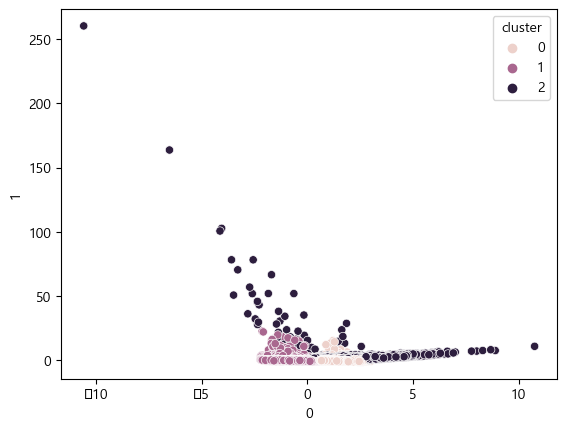

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

axs = plt.subplots()
axs = sns.scatterplot(x = 0, y = 1, hue='cluster', data=pca_df)

In [17]:
# 잘안나눠진느낌 다시해보자

In [31]:
cla = pd.DataFrame(cc_scaled) 

In [45]:
cla.drop(columns=[4], inplace=True)


In [52]:
cla.head(535252235)

,0,1,2,3
0,-1.532063,-0.140526,-0.045752,-0.058538
1,-0.211191,0.385523,-0.257181,-0.043343
2,-1.091773,-0.140526,0.048217,-0.054268
3,0.669390,0.122498,7.518720,0.357409
4,0.669390,0.297848,-0.327657,-0.085863
...,...,...,...,...
277502,-0.211191,-0.052852,-0.374642,-0.086658
277503,1.109681,-1.017275,-0.374642,-0.064104
277504,1.549971,-0.578900,-0.374642,-0.073827
277505,1.109681,-0.403551,-0.374642,-0.073839


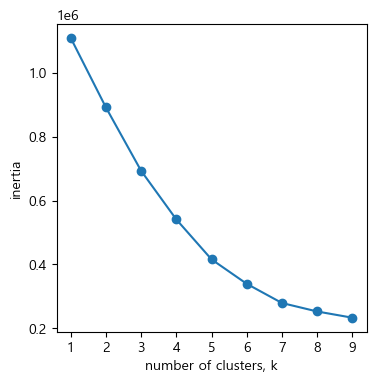

In [47]:
from sklearn.cluster import KMeans
# 적절한 군집수 찾기
# Inertia(군집 내 거리제곱합의 합) value (적정 군집수)

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(cla)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(4, 4))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## 군집 개수를 기울기로 정하는 것은 일반적으로 '엘보우(elbow) 메서드'라고 불리는 방법을 사용합니다. 이 방법은 군집 개수(k)에 따른 이너셔(inertia) 값을 그래프로 나타내고, 그래프의 기울기를 관찰하여 최적의 군집 개수를 결정하는 방법입니다.

In [53]:
import numpy as np

# Calculate differences between consecutive inertia values
inertia_diff = np.diff(inertias)

# Calculate slope
slope = inertia_diff[1] / (ks[1] - ks[0])
slope1 = inertia_diff[2] / (ks[2] - ks[1])
slope2 = inertia_diff[3] / (ks[3] - ks[2])
slope3 = inertia_diff[4] / (ks[4] - ks[3])
slope4 = inertia_diff[4] / (ks[5] - ks[4])
slope5 = inertia_diff[5] / (ks[6] - ks[5])
slope6 = inertia_diff[6] / (ks[7] - ks[6])
slope7 = inertia_diff[7] / (ks[8] - ks[7])
print(f"Slope between  cluster and  clusters: {slope},{slope1},{slope2},{slope3},{slope4},{slope5},{slope6},{slope7}")


Slope between  cluster and  clusters: -198668.77317807882,-152390.3055082918,-125137.1220737226,-76573.0510857997,-76573.0510857997,-60069.4617538352,-26517.737854214152,-19512.989661165222


## 결국 군집개수를 정하는 하이퍼 파라미터는 개인이 정하는 것 1에서 5까지는 확실히 기울기가 이어지니 5개를쓰겟음

In [ ]:
# 위에 그래프를 보면 5개까지는 쓸만할것같다(기울기로 판별)

In [59]:
# K-Means 모델과 군집 예측값을 생성

# 클러스터 모델 생성 파라미터는 원할 경우 추가
clust_model = KMeans(n_clusters = 5 # 클러스터 갯수
#                      , n_init=10 # initial centroid를 몇번 샘플링한건지, 데이터가 많으면 많이 돌릴수록안정화된 결과가 나옴
#                      , max_iter=500 # KMeans를 몇번 반복 수행할건지, K가 큰 경우 1000정도로 높여준다
#                      , random_state = 42
#                      , algorithm='auto'
                    )

# 생성한 모델로 데이터를 학습시킴
clust_model.fit(cla) # unsupervised learning 

# 결과 값을 변수에 저장
centers = clust_model.cluster_centers_ # 각 군집의 중심점
pred = clust_model.predict(cla) # 각 예측군집

print(pd.DataFrame(centers))
print(pred[:10])

          0         1         2          3
0  0.026324  0.667506  4.114457   0.176539
1  1.056421 -0.196179 -0.183226  -0.023133
2 -0.447397  0.996710 -0.180738  -0.070440
3 -0.737607 -0.885714 -0.180505   0.054648
4 -0.321264 -0.288478  1.108300  98.204092
[3 2 3 0 1 1 3 3 3 2]


In [68]:
clust_df= clust_df.drop('clust', axis=1) #

In [73]:
df.head()

,분기,상품,거래횟수,구매금액
0,0,17,15,134700
1,3,23,6,197760
2,1,17,19,152420
3,5,20,337,1860890
4,5,22,3,21300


In [70]:
clust_df = df.copy()
clust_df['clust'] = pred
clust_df.head(123)

,분기,상품,거래횟수,구매금액,clust
0,0,17,15,134700,3
1,3,23,6,197760,2
2,1,17,19,152420,3
3,5,20,337,1860890,0
4,5,22,3,21300,1
...,...,...,...,...,...
118,4,24,16,92400,2
119,3,25,8,52300,2
120,4,52,1,1200,2
121,7,23,13,620100,1


In [71]:
clust_df.head(123)

,분기,상품,거래횟수,구매금액,clust
0,0,17,15,134700,3
1,3,23,6,197760,2
2,1,17,19,152420,3
3,5,20,337,1860890,0
4,5,22,3,21300,1
...,...,...,...,...,...
118,4,24,16,92400,2
119,3,25,8,52300,2
120,4,52,1,1200,2
121,7,23,13,620100,1


C:\Users\thkkk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\thkkk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


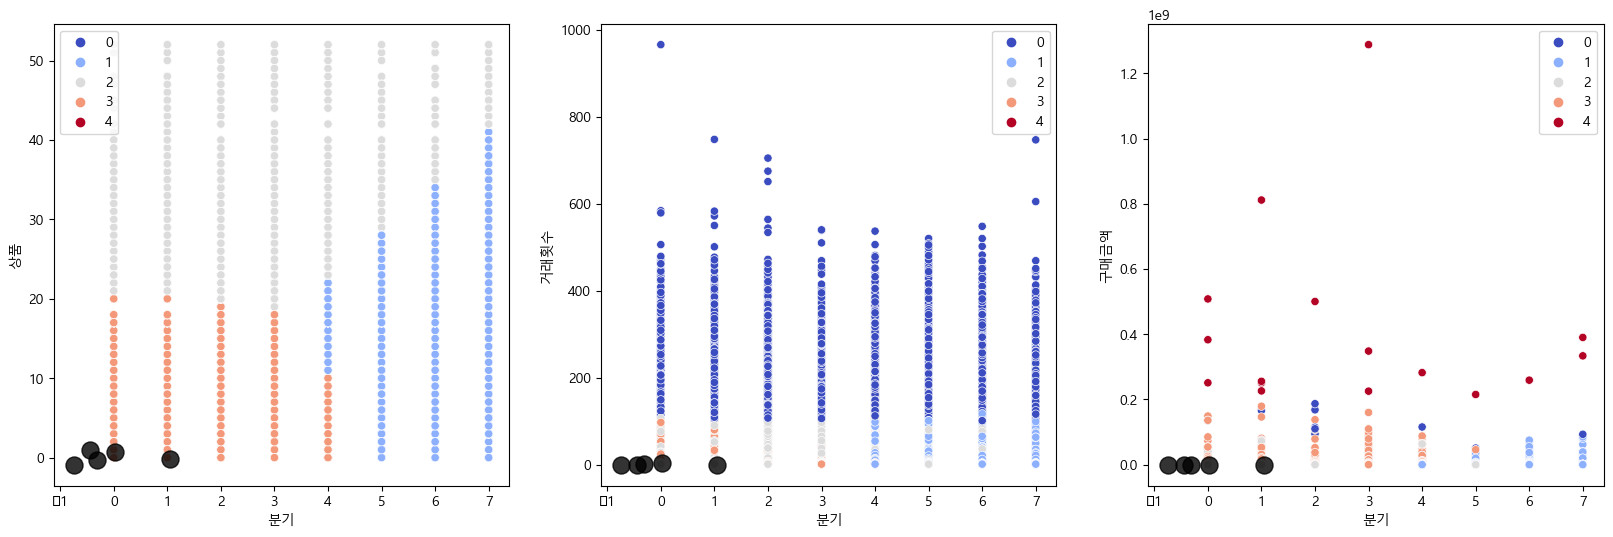

In [74]:
plt.figure(figsize=(20, 6))

X = clust_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,1], c='black', alpha=0.8, s=150)

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,2], c='black', alpha=0.8, s=150)

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,3], data=df, hue=clust_model.labels_, palette='coolwarm')
plt.scatter(centers[:,0], centers[:,3], c='black', alpha=0.8, s=150)

plt.show()

In [75]:
cluster_mean= clust_df.groupby('clust').mean()
cluster_mean

,분기,상품,거래횟수,구매금액
clust,,,,
0,3.539282,26.214962,192.089482,1.110328e+06
1,5.879172,16.366601,9.148135,2.807659e+05
2,2.463442,29.970835,9.254092,8.531202e+04
3,1.804678,8.500089,9.263661,6.053575e+05
4,2.750000,15.312500,64.125000,4.079271e+08


In [76]:
# 1 그룹 :2번쨰로 방문하고 상품종류를 많이사고 거래횟수가 많고 구매금액은 2등인 그룹
# 2그룹  :1번쨰로 많이 방문하고 상품종류를 적게사고 거래횟수도 가장적고 구매금액은 4등인 그룹
# 3그룹  :4번째로 많이 방문하고 상품종류를 가장많이사고 거래횟수도적고 구매금액은 5등인 그룹
# 4그룹 : 5번째로 많이 방문하고 상품종류를 가장 적게사고 거래횟수도적고 구매금액은 3등인 그룹
# 5그룹 : 3번쨰로 많이방문하고 상품종류를  적당히사고  거래횟수가 2번째롬 많고 구매금액은 1등인그룹 

C:\Users\thkkk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


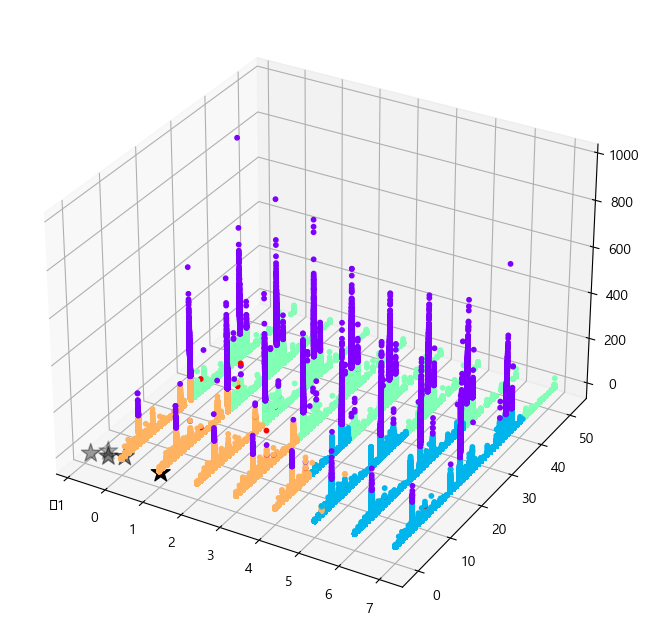

In [77]:
# 3차원으로 시각화하기

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = clust_df

# 데이터 scatterplot
ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.clust
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )

# centroid scatterplot
ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')


plt.show()

# 3차원으로 만들어봄 왼쪽기준 분기 오른쪽기준 상품 y기준 거래횟수

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# StandardScaler
X_features = clust_df[['분기','상품','거래횟수']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
clust_df["cluster_label"] = labels

# 실루엣 스코어
silhouette_kmeans = silhouette_score(X_features_scaled, labels)
print(f"실루엣 스코어: {silhouette_kmeans:.3f}")

실루엣 스코어: 0.342


In [81]:
from cuml.cluster import KMeans as cuKMeans
from cuml.preprocessing import StandardScaler as cuStandardScaler

# GPU 가속화를 위해 cuML의 KMeans와 StandardScaler를 사용
X_features = clust_df[['분기','상품','거래횟수']].values
X_features_scaled = cuStandardScaler().fit_transform(X_features)

kmeans = cuKMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)

clust_df["cluster_label"] = labels

# 실루엣 스코어 계산
silhouette_kmeans = silhouette_score(X_features_scaled, labels)
print(f"실루엣 스코어: {silhouette_kmeans:.3f}")


ModuleNotFoundError: No module named 'cuml'

In [83]:
!pip install cuml# gpu 지원라이브러리 할려면.... 개어렵게 ndrive 지우고 설치해야함 나중에하자


ERROR: Invalid requirement: 'cuml#'


In [90]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [88]:
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

C:\Users\thkkk\AppData\Local\Temp\ipykernel_7736\3742610483.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\thkkk\AppData\Local\Temp\ipykernel_7736\3742610483.py:35: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


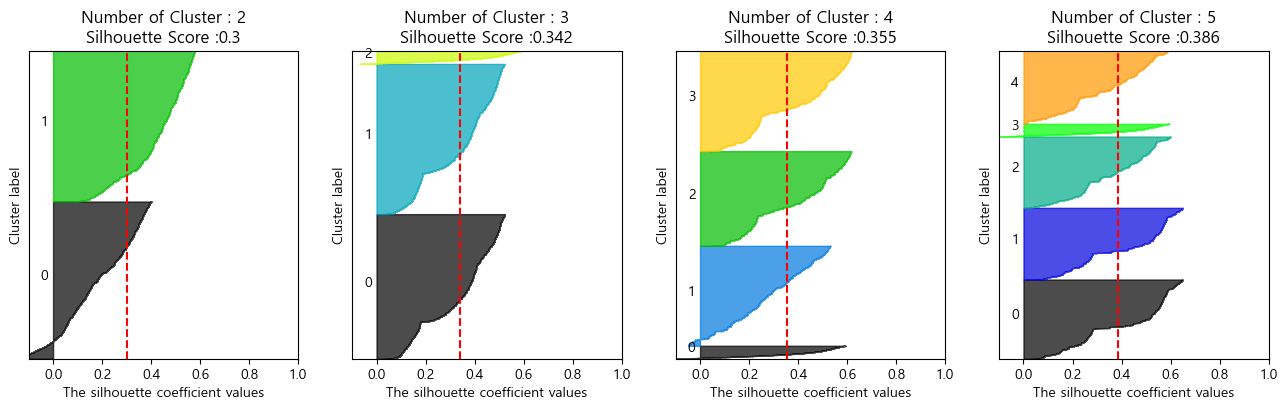

C:\Users\thkkk\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


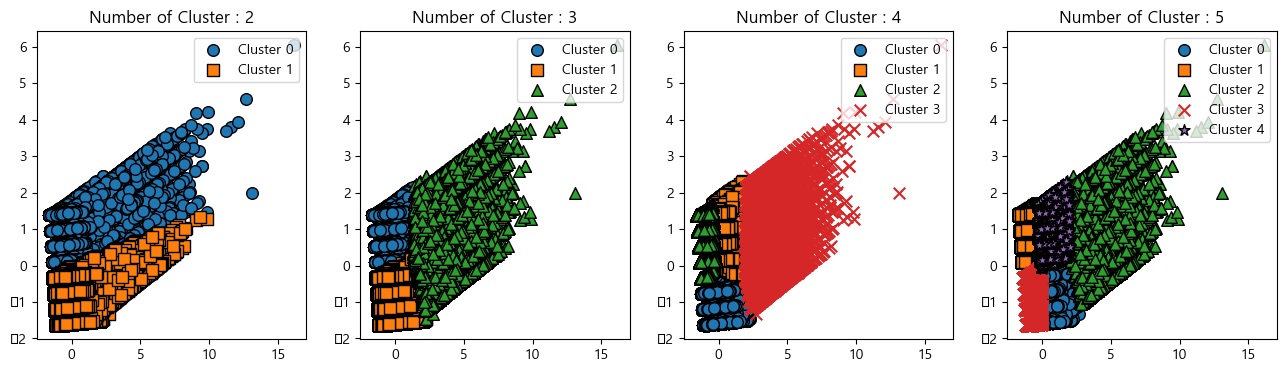

In [91]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)